# Import local dataset

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist-data/")
train_img, train_label = mnist.train.images, mnist.train.labels
test_img, test_label = mnist.test.images, mnist.test.labels

W0725 05:55:59.549443 139674573018880 deprecation.py:323] From <ipython-input-1-4dceece8a4ae>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0725 05:55:59.550169 139674573018880 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0725 05:55:59.550886 139674573018880 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting ./mnist-data/train-images-idx3-ubyte.gz


W0725 05:55:59.775290 139674573018880 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0725 05:55:59.816499 139674573018880 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting ./mnist-data/train-labels-idx1-ubyte.gz
Extracting ./mnist-data/t10k-images-idx3-ubyte.gz
Extracting ./mnist-data/t10k-labels-idx1-ubyte.gz


In [2]:
print(train_img.shape)
print(train_label.shape)
print(test_img.shape)
print(test_label.shape)

(55000, 784)
(55000,)
(10000, 784)
(10000,)


# import online dataset

In [2]:
import os
# export proxy for downloading dataset online 
# dataset from Internet is much better than local ones
# However, still could use the local dataset if proxy doesnt work
os.environ["http_proxy"] = '10.41.69.79:13128'
os.environ["https_proxy"] = '10.41.69.79:13128'
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [122]:
x_train.shape

(60000, 28, 28)

# inspect images

In [3]:
train_img = train_img.reshape(-1, 28, 28).astype('float32')
test_img = test_img.reshape(-1, 28, 28).astype('float32')
label_dict={0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}
print(train_img.shape)
print(train_label)

(55000, 28, 28)
[4 0 7 ... 3 0 5]


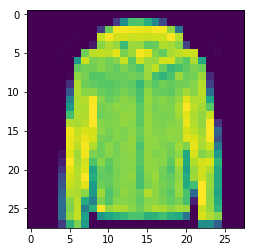

4


In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_img[0])
#plt.colorbar()
plt.grid(False)
plt.show()
print(train_label[0])

In [6]:
def plot_image_label_prediction(images, labels, prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,12)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
        
        title=label_dict[labels[idx]]
        #show predicted outcome in order to where the model should improve
        if(len(prediction)>0):
            title+='->'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

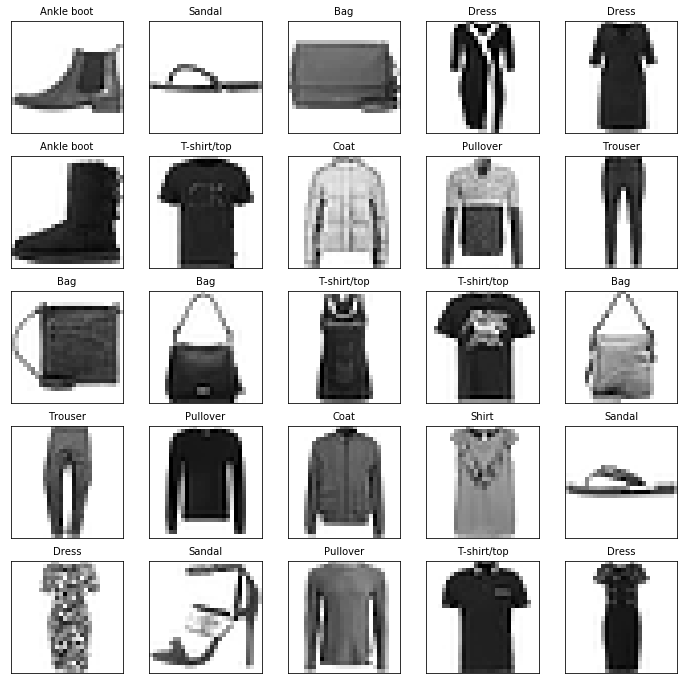

In [8]:
%matplotlib inline
plot_image_label_prediction(train_img.reshape(train_img.shape[0],28,28),train_label,[],50500,25)

# Transfer Learning( VGG )

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Dropout,GlobalAveragePooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
os.environ["http_proxy"] = '10.41.69.79:13128'
os.environ["https_proxy"] = '10.41.69.79:13128'

## Convert image shape to VGG's minimum (32,32,3)

In [5]:
trainimg32321 = []
for i in range(train_img.shape[0]):
    newarray = np.pad(train_img[i],(0,4),mode='constant',constant_values=0)
    trainimg32321.append(newarray)
trainimg32321 = np.asarray(trainimg32321,dtype=np.float32)

testimg32321 = []
for i in range(test_img.shape[0]):
    newarray = np.pad(test_img[i],(0,4),mode='constant',constant_values=0)
    testimg32321.append(newarray)
testimg32321 = np.asarray(testimg32321,dtype=np.float32)

trainimg32321 = trainimg32321.reshape(trainimg32321.shape[0],32,32,1)
testimg32321 = testimg32321.reshape(testimg32321.shape[0],32,32,1)
print(trainimg32321.shape)
print(testimg32321.shape)

(55000, 32, 32, 1)
(10000, 32, 32, 1)


In [6]:
trainimg32323 = []
for i in range(train_img.shape[0]):
    newarray = np.pad(train_img[i],(0,4),mode='constant',constant_values=0)
    trainimg32323.append(newarray)
trainimg32323 = np.asarray(trainimg32323,dtype=np.float32)

testimg32323 = []
for i in range(test_img.shape[0]):
    newarray = np.pad(test_img[i],(0,4),mode='constant',constant_values=0)
    testimg32323.append(newarray)
testimg32323 = np.asarray(testimg32323,dtype=np.float32)

trainimg32323 = np.stack((trainimg32323,)*3,axis=-1)
testimg32323 = np.stack((testimg32323,)*3,axis=-1)
print(trainimg32323.shape)
print(testimg32323.shape)

(55000, 32, 32, 3)
(10000, 32, 32, 3)


In [10]:
input_tensor = Input(shape=(32,32,3),name='owninputtensor')
base_model=VGG16(weights='imagenet',input_tensor=input_tensor,include_top=False) 
#imports the VGG16 model and discards the neuron layer.
#from keras.engine import InputLayer
for layer in base_model.layers:
    layer.trainable=False
#x=base_model.layers[-5].output
x=base_model.output
x=GlobalAveragePooling2D(name='GlobalAveragePooling2D')(x)
#x = Flatten(name='flatten')(x)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
#It's bad to use Dropout, because why should we trained some neural but not use it
x = Dropout(0.5)(x)
preds = Dense(10, activation='softmax', name='predictions')(x)
modelvgg1=Model(inputs=base_model.input,outputs=[preds, x])
modelvgg1.summary()
# for i,layer in enumerate(model.layers):
#     print(i,layer.name)


Exception: URL fetch failure on https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5: None -- Tunnel connection failed: 503 Service Unavailable

In [144]:
es = EarlyStopping(monitor='val_acc',mode='max',verbose=1,patience=30)
modelvgg1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
train_history = modelvgg1.fit(x=trainimg32323,y=train_label,validation_split=0.2, epochs=500, batch_size=300,verbose=1,callbacks=[es])


Train on 44000 samples, validate on 11000 samples
Epoch 1/500
44000/44000 [==============================] - 13s 302us/step - loss: 0.6316 - acc: 0.7769 - val_loss: 0.4660 - val_acc: 0.8318
Epoch 2/500
44000/44000 [==============================] - 6s 146us/step - loss: 0.4058 - acc: 0.8508 - val_loss: 0.4087 - val_acc: 0.8491
Epoch 3/500
44000/44000 [==============================] - 7s 151us/step - loss: 0.3607 - acc: 0.8661 - val_loss: 0.3735 - val_acc: 0.8635
Epoch 4/500
44000/44000 [==============================] - 7s 148us/step - loss: 0.3397 - acc: 0.8742 - val_loss: 0.4008 - val_acc: 0.8534
Epoch 5/500
44000/44000 [==============================] - 6s 147us/step - loss: 0.3211 - acc: 0.8799 - val_loss: 0.4114 - val_acc: 0.8495
Epoch 6/500
44000/44000 [==============================] - 7s 149us/step - loss: 0.3021 - acc: 0.8871 - val_loss: 0.4048 - val_acc: 0.8516
Epoch 7/500
44000/44000 [==============================] - 6s 146us/step - loss: 0.2844 - acc: 0.8938 - val_loss: 0

In [156]:
test_loss, test_acc = modelvgg1.evaluate(testimg32323, test_label)
print("Accuracy: ",test_acc)

10000/10000 [==============================] - 2s 244us/step
Accuracy:  0.8732


## Test model with downloaded images

In [19]:
def predictgray(model, img):
    x = image.img_to_array(img)
    x = np.mean(x, axis=2)
    plt.figure()
    plt.imshow(image.array_to_img(x.reshape(x.shape[0],x.shape[1],1).astype('float32')))
    x = x.reshape(1,x.shape[0],x.shape[1],1).astype('float32')
    #x = np.expand_dims(x, axis=0)
    #x = preprocess_input(x)
    preds = model.predict(x)
    print(preds)
    print(np.argmax(preds))
    #print(np.int_(np.argmax(preds),dtype=np.uint8))
    return preds

import numpy as np
from tensorflow.keras.preprocessing import image
def predictrgb(model, img):
    plt.figure()
    plt.imshow(img)
    x = image.img_to_array(img)
    #x = np.mean(x, axis=2)
    x = x.reshape(1,x.shape[0],x.shape[1],3).astype('float32')
    #x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    print(preds)
    print(np.argmax(preds))
    #print(np.int_(np.argmax(preds),dtype=np.uint8))
    return preds

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


bag.jpeg
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
8
sneaker.jpeg
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0
coat.jpeg
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
4
dress.png
[[0.         0.         0.         0.         0.07557413 0.
  0.         0.         0.92442584 0.        ]]
8
dress2.png
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
2


9
9


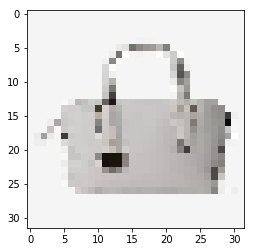

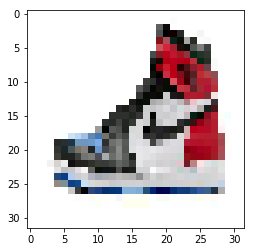

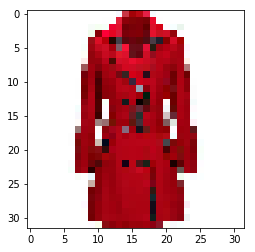

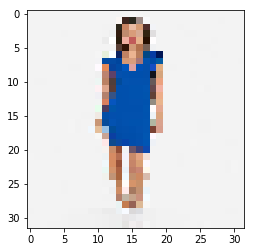

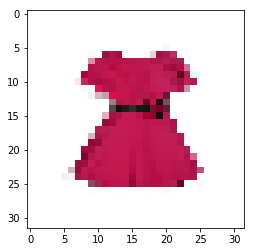

In [158]:
for i in range(len(label_dict)):
    print(i,label_dict[i])
print('\n')

for root,dirs,files in os.walk('./fashion_test/'):
    for file in files:
        print(file)
        img = image.load_img(os.path.join(root,file), target_size=(32, 32))
        #img_rgb = image.img_to_array(img)
        #img_gray = np.mean(img_rgb, axis=2)
        #img_gray = img_gray.reshape(1,32,32,1).astype('float32')
        #print(img_gray.shape)
        predictrgb(modelvgg1, img)

print('\n')
print(np.argmax(modelvgg1.predict(testimg32323[0].reshape(1,32,32,3).astype('float32'))))
print(test_label[0])

# Customized Model of VGG

In [32]:
from keras.layers import Input,Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from keras.models import Model
def vgg_fm(input_shape):
    input_tensor=Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_tensor)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), name='block4_pool')(x)

    # Classification block
    #x = Flatten(name='flatten')(x)
    x = GlobalAveragePooling2D(name='GlobalAveragePooling2D')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dropout(0.5)(x)
    x = Dense(10, activation='softmax', name='predictions')(x)
    return Model(inputs=[input_tensor],outputs=[x])

## Model Summary & Accuracy

In [33]:
trainimg28281 = train_img.reshape(train_img.shape[0], 28, 28,1).astype('float32')
testimg28281 = test_img.reshape(test_img.shape[0], 28, 28,1).astype('float32')
input_shape = trainimg28281.shape[1:]
modelvgg2 = vgg_fm(input_shape)
print(trainimg28281.shape)
print(modelvgg2.summary())

(55000, 28, 28, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 28, 28, 64)        640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 28, 28, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 14, 14, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 14, 14, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 14, 14, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 7, 7, 128)         0 

In [34]:
#from keras.callbacks import EarlyStopping
#es = EarlyStopping(monitor='val_acc',mode='max',verbose=1, patience=50)
modelvgg2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
train_history = modelvgg2.fit(x=trainimg28281,y=train_label,validation_split=0.2, epochs=1000, batch_size=250,verbose=2,callbacks=[es])


Train on 44000 samples, validate on 11000 samples
Epoch 1/1000
 - 11s - loss: 1.2032 - acc: 0.5275 - val_loss: 0.5642 - val_acc: 0.7901
Epoch 2/1000
 - 9s - loss: 0.4716 - acc: 0.8234 - val_loss: 0.3810 - val_acc: 0.8580
Epoch 3/1000
 - 9s - loss: 0.3510 - acc: 0.8688 - val_loss: 0.3250 - val_acc: 0.8799
Epoch 4/1000
 - 9s - loss: 0.3032 - acc: 0.8892 - val_loss: 0.2839 - val_acc: 0.8960
Epoch 5/1000
 - 9s - loss: 0.2661 - acc: 0.9034 - val_loss: 0.2918 - val_acc: 0.8927
Epoch 6/1000
 - 9s - loss: 0.2348 - acc: 0.9140 - val_loss: 0.2605 - val_acc: 0.9098
Epoch 7/1000
 - 9s - loss: 0.2092 - acc: 0.9237 - val_loss: 0.2446 - val_acc: 0.9127
Epoch 8/1000
 - 9s - loss: 0.1993 - acc: 0.9276 - val_loss: 0.2421 - val_acc: 0.9165
Epoch 9/1000
 - 9s - loss: 0.1880 - acc: 0.9323 - val_loss: 0.2401 - val_acc: 0.9185
Epoch 10/1000
 - 9s - loss: 0.1693 - acc: 0.9385 - val_loss: 0.2467 - val_acc: 0.9155
Epoch 11/1000
 - 9s - loss: 0.1492 - acc: 0.9475 - val_loss: 0.2356 - val_acc: 0.9232
Epoch 12/100

Epoch 96/1000
 - 9s - loss: 0.0234 - acc: 0.9935 - val_loss: 0.6220 - val_acc: 0.9265
Epoch 97/1000
 - 9s - loss: 0.0107 - acc: 0.9971 - val_loss: 0.5831 - val_acc: 0.9275
Epoch 98/1000
 - 9s - loss: 0.0239 - acc: 0.9937 - val_loss: 0.5709 - val_acc: 0.9285
Epoch 99/1000
 - 9s - loss: 0.0334 - acc: 0.9910 - val_loss: 0.4767 - val_acc: 0.9234
Epoch 100/1000
 - 9s - loss: 0.0216 - acc: 0.9932 - val_loss: 0.4992 - val_acc: 0.9265
Epoch 101/1000
 - 9s - loss: 0.0115 - acc: 0.9967 - val_loss: 0.5753 - val_acc: 0.9240
Epoch 102/1000
 - 9s - loss: 0.0239 - acc: 0.9930 - val_loss: 0.5285 - val_acc: 0.9214
Epoch 103/1000
 - 9s - loss: 0.0137 - acc: 0.9958 - val_loss: 0.5508 - val_acc: 0.9274
Epoch 104/1000
 - 9s - loss: 0.0272 - acc: 0.9927 - val_loss: 0.5120 - val_acc: 0.9232
Epoch 105/1000
 - 9s - loss: 0.0185 - acc: 0.9954 - val_loss: 0.5550 - val_acc: 0.9272
Epoch 106/1000
 - 9s - loss: 0.0359 - acc: 0.9913 - val_loss: 0.5746 - val_acc: 0.9210
Epoch 107/1000
 - 9s - loss: 0.0199 - acc: 0.99

In [35]:
test_loss, test_acc = modelvgg2.evaluate(testimg28281, test_label)

print('Test accuracy:', test_acc)
print('Test Loss:', test_loss)

10000/10000 [==============================] - 1s 134us/step
Test accuracy: 0.9132
Test Loss: 0.5152208694465574


0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


bag.jpeg
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
8
sneaker.jpeg
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1
coat.jpeg
[[1.0000000e+00 5.3077029e-37 1.2484874e-35 2.5097726e-31 0.0000000e+00
  0.0000000e+00 0.0000000e+00 4.5814644e-37 0.0000000e+00 0.0000000e+00]]
0
dress.png
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
6
dress2.png
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


9
9


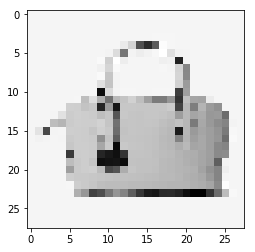

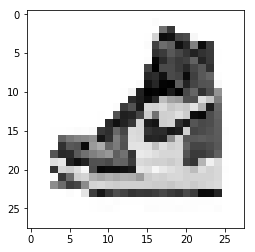

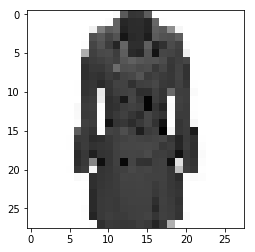

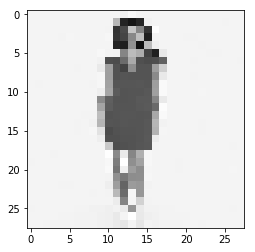

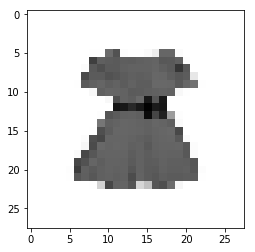

In [43]:
for i in range(len(label_dict)):
    print(i,label_dict[i])
print('\n')

for root,dirs,files in os.walk('./fashion_test/'):
    for file in files:
        print(file)
        img = image.load_img(os.path.join(root,file), target_size=(28, 28))
        #img_rgb = image.img_to_array(img)
        #img_gray = np.mean(img_rgb, axis=2)
        #img_gray = img_gray.reshape(1,32,32,1).astype('float32')
        #print(img_gray.shape)
        predictgray(modelvgg2, img)

print('\n')
print(np.argmax(modelvgg2.predict(testimg28281[0].reshape(1,28,28,1).astype('float32'))))
print(test_label[0])

In [58]:
predict_class = []
prediction = modelvgg2.predict(testimg28281)
for index in range (len(test_label)):
    predict_class.append(np.argmax(prediction[index]))
predict_class = np.int_(predict_class,dtype=np.uint8)
#print(len(predict_class))
print(predict_class)

[9 2 1 ... 8 1 5]


In [60]:
import pandas as pd
#print(test_label)
pd.crosstab(test_label, predict_class, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,892,0,15,10,4,0,75,0,4,0
1,4,980,4,7,3,0,1,0,1,0
2,24,1,894,7,40,0,34,0,0,0
3,45,8,11,886,18,0,32,0,0,0
4,2,0,52,26,866,0,54,0,0,0
5,1,0,0,0,0,982,0,12,0,5
6,136,0,74,12,59,1,715,0,3,0
7,2,0,0,0,0,4,0,983,0,11
8,5,1,3,2,3,4,8,1,973,0


# Transfer Learning( ResNet50 )

In [12]:
os.environ["http_proxy"] = '10.41.69.79:13128'
os.environ["https_proxy"] = '10.41.69.79:13128'
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Dropout,GlobalAveragePooling2D,Input,Flatten

input_tensor = Input(shape=(28,28,3),name='owninputtensor')
base_model=ResNet50(weights=None,input_tensor=input_tensor,include_top=False) 
for layer in base_model.layers:
    layer.trainable=False 
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
owninputtensor (InputLayer)     (None, 28, 28, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 34, 34, 3)    0           owninputtensor[0][0]             
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 14, 14, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 14, 14, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

/usr/local/lib/python3.5/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [70]:
#x=base_model.layers[-10].output
x = base_model.output
#x=GlobalAveragePooling2D(name='GlobalAveragePooling2D')(x)
# Classification block
x = Flatten(name='flatten')(x)
x = Dense(512, activation='relu', name='Dense512')(x)
x = Dropout(0.5)(x)
preds = Dense(10, activation='softmax', name='predictions')(x)
Res50Model1=Model(inputs=base_model.input,outputs=preds)
print(Res50Model1.summary())
#Res50Model.summary()
# for i,layer in enumerate(model.layers):
#     print(i,layer.name)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
owninputtensor (InputLayer)     (None, 28, 28, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 34, 34, 3)    0           owninputtensor[0][0]             
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 14, 14, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 14, 14, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [65]:
trainimg28283 = np.stack((train_img,)*3, axis=-1)
testimg28283 = np.stack((test_img,)*3, axis=-1)
trainimg28283.shape

(55000, 28, 28, 3)

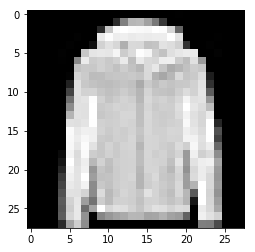

In [68]:
plt.figure()
plt.imshow(image.array_to_img(trainimg28283[0]))

In [71]:
#from keras.callbacks import EarlyStopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
Res50Model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
history = Res50Model1.fit(x=trainimg28283,y=train_label,validation_split=0.2,epochs=1000,batch_size=250,verbose=2,callbacks=[es])


Train on 44000 samples, validate on 11000 samples
Epoch 1/1000
 - 9s - loss: 2.4220 - acc: 0.1581 - val_loss: 6.3287 - val_acc: 0.1011
Epoch 2/1000
 - 5s - loss: 2.0254 - acc: 0.2331 - val_loss: 7.0436 - val_acc: 0.1020
Epoch 3/1000
 - 5s - loss: 1.9485 - acc: 0.2610 - val_loss: 5.3779 - val_acc: 0.0746
Epoch 4/1000
 - 5s - loss: 1.9098 - acc: 0.2757 - val_loss: 4.9797 - val_acc: 0.0709
Epoch 5/1000
 - 5s - loss: 1.8885 - acc: 0.2840 - val_loss: 5.7842 - val_acc: 0.1034
Epoch 6/1000
 - 5s - loss: 1.8615 - acc: 0.2940 - val_loss: 6.7199 - val_acc: 0.0974
Epoch 7/1000
 - 5s - loss: 1.8517 - acc: 0.2965 - val_loss: 4.6537 - val_acc: 0.1024
Epoch 8/1000
 - 5s - loss: 1.8443 - acc: 0.3034 - val_loss: 8.4019 - val_acc: 0.1020
Epoch 9/1000
 - 5s - loss: 1.8180 - acc: 0.3131 - val_loss: 8.8457 - val_acc: 0.0992
Epoch 10/1000
 - 5s - loss: 1.8169 - acc: 0.3121 - val_loss: 5.8657 - val_acc: 0.0727
Epoch 11/1000
 - 5s - loss: 1.8079 - acc: 0.3183 - val_loss: 7.8491 - val_acc: 0.1021
Epoch 12/1000

Epoch 96/1000
 - 5s - loss: 1.7389 - acc: 0.3440 - val_loss: 7.3995 - val_acc: 0.0918
Epoch 97/1000
 - 5s - loss: 1.7421 - acc: 0.3421 - val_loss: 6.0738 - val_acc: 0.1235
Epoch 98/1000
 - 5s - loss: 1.7464 - acc: 0.3423 - val_loss: 7.1611 - val_acc: 0.1276
Epoch 99/1000
 - 5s - loss: 1.7493 - acc: 0.3455 - val_loss: 7.2624 - val_acc: 0.1213
Epoch 100/1000
 - 5s - loss: 1.7408 - acc: 0.3469 - val_loss: 7.1255 - val_acc: 0.1154
Epoch 101/1000
 - 5s - loss: 1.7374 - acc: 0.3469 - val_loss: 7.4836 - val_acc: 0.1233
Epoch 102/1000
 - 5s - loss: 1.7444 - acc: 0.3433 - val_loss: 7.0442 - val_acc: 0.1285
Epoch 103/1000
 - 5s - loss: 1.7411 - acc: 0.3435 - val_loss: 6.5158 - val_acc: 0.1207
Epoch 104/1000
 - 5s - loss: 1.7374 - acc: 0.3456 - val_loss: 6.9038 - val_acc: 0.1291
Epoch 105/1000
 - 5s - loss: 1.7427 - acc: 0.3426 - val_loss: 7.6755 - val_acc: 0.1020
Epoch 106/1000
 - 5s - loss: 1.7389 - acc: 0.3423 - val_loss: 6.4635 - val_acc: 0.1042
Epoch 107/1000
 - 5s - loss: 1.7419 - acc: 0.34

# Customized ResNet34

In [72]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten,Dropout,BatchNormalization,GlobalAveragePooling2D,concatenate,Input, concatenate,Add
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.optimizers import Adam
#Define convolution with batchnromalization
def Conv2d_BN(x, nb_filter,kernel_size, padding='same',strides=(1,1),name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None

    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)
    x = BatchNormalization(axis=3,name=bn_name)(x)
    return x
  
#Define Residual Block for ResNet34(2 convolution layers)
def Residual_Block(input_model,nb_filter,kernel_size,strides=(1,1), with_conv_shortcut =False):
    x = Conv2d_BN(input_model,nb_filter=nb_filter,kernel_size=kernel_size,strides=strides,padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter, kernel_size=kernel_size,padding='same')
    
    #need convolution on shortcut for add different channel
    if with_conv_shortcut:
        shortcut = Conv2d_BN(input_model,nb_filter=nb_filter,strides=strides,kernel_size=kernel_size)
        #x = add([x,shortcut])
        x = Add()([x, shortcut])
        return x
    else:
        #x = add([x,input_model])
        x = Add()([x, input_model])
        return x

In [73]:
#Built ResNet34
def ResNet34(input_shape):
    
    input_tensor=Input(shape=input_shape)
    
    x = Conv2d_BN(input_tensor,64,(3,3),strides=(2,2),padding='same')
    x = MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(x)  

    #Residual conv2_x ouput 56x56x64 
    x = Residual_Block(x,nb_filter=64,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=64,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=64,kernel_size=(3,3))
    
    #Residual conv3_x ouput 28x28x128 
    x = Residual_Block(x,nb_filter=128,kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)# need do convolution to add different channel
    x = Residual_Block(x,nb_filter=128,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=128,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=128,kernel_size=(3,3))
    
    #Residual conv4_x ouput 14x14x256
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)# need do convolution to add different channel
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3))
    
    #Residual conv5_x ouput 7x7x512
    x = Residual_Block(x,nb_filter=512,kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)
    x = Residual_Block(x,nb_filter=512,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=512,kernel_size=(3,3))


    #Using AveragePooling replace flatten
    x = GlobalAveragePooling2D()(x)
    x = Dense(10,activation='softmax')(x)
    
    return Model(inputs=[input_tensor],outputs=[x]) 

# Model Summary & Accuracy of ResNet

In [74]:
input_shape = trainimg28281.shape[1:]
Res34Model1 = ResNet34(input_shape)
print(Res34Model1.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 64)   640         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 14, 14, 64)   256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 7, 7, 64)     0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [75]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
Res34Model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
train_history = Res34Model1.fit(x=trainimg28281,y=train_label,validation_split=0.2, epochs=1000, batch_size=200,verbose=2,callbacks=[es])


Train on 44000 samples, validate on 11000 samples
Epoch 1/1000
 - 21s - loss: 0.6337 - acc: 0.8070 - val_loss: 0.4280 - val_acc: 0.8611
Epoch 2/1000
 - 14s - loss: 0.3243 - acc: 0.8816 - val_loss: 0.3391 - val_acc: 0.8841
Epoch 3/1000
 - 14s - loss: 0.2607 - acc: 0.9035 - val_loss: 0.3535 - val_acc: 0.8785
Epoch 4/1000
 - 14s - loss: 0.2203 - acc: 0.9179 - val_loss: 0.3567 - val_acc: 0.8851
Epoch 5/1000
 - 14s - loss: 0.1993 - acc: 0.9268 - val_loss: 0.3249 - val_acc: 0.8935
Epoch 6/1000
 - 14s - loss: 0.1800 - acc: 0.9332 - val_loss: 0.3649 - val_acc: 0.8875
Epoch 7/1000
 - 14s - loss: 0.1601 - acc: 0.9406 - val_loss: 0.3693 - val_acc: 0.8906
Epoch 8/1000
 - 14s - loss: 0.1488 - acc: 0.9456 - val_loss: 0.5685 - val_acc: 0.8780
Epoch 9/1000
 - 14s - loss: 0.1323 - acc: 0.9513 - val_loss: 0.3571 - val_acc: 0.8871
Epoch 10/1000
 - 14s - loss: 0.1197 - acc: 0.9568 - val_loss: 0.3584 - val_acc: 0.8989
Epoch 11/1000
 - 14s - loss: 0.1146 - acc: 0.9581 - val_loss: 0.3580 - val_acc: 0.8965
Ep

Epoch 95/1000
 - 14s - loss: 0.0080 - acc: 0.9978 - val_loss: 0.6143 - val_acc: 0.8987
Epoch 96/1000
 - 14s - loss: 0.0087 - acc: 0.9972 - val_loss: 0.5448 - val_acc: 0.9067
Epoch 97/1000
 - 14s - loss: 0.0100 - acc: 0.9967 - val_loss: 0.5644 - val_acc: 0.9050
Epoch 98/1000
 - 14s - loss: 0.0101 - acc: 0.9968 - val_loss: 0.5266 - val_acc: 0.9063
Epoch 99/1000
 - 14s - loss: 0.0111 - acc: 0.9965 - val_loss: 0.5177 - val_acc: 0.9069
Epoch 100/1000
 - 14s - loss: 0.0090 - acc: 0.9971 - val_loss: 0.5038 - val_acc: 0.9065
Epoch 101/1000
 - 14s - loss: 0.0065 - acc: 0.9980 - val_loss: 0.5138 - val_acc: 0.9104
Epoch 102/1000
 - 14s - loss: 0.0058 - acc: 0.9980 - val_loss: 0.5638 - val_acc: 0.9092
Epoch 103/1000
 - 14s - loss: 0.0101 - acc: 0.9963 - val_loss: 0.5284 - val_acc: 0.9053
Epoch 104/1000
 - 14s - loss: 0.0050 - acc: 0.9984 - val_loss: 0.5743 - val_acc: 0.9117
Epoch 105/1000
 - 14s - loss: 0.0035 - acc: 0.9991 - val_loss: 0.5846 - val_acc: 0.9048
Epoch 106/1000
 - 14s - loss: 0.0082 

In [76]:
test_loss, test_acc = Res34Model1.evaluate(testimg28281, test_label)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 3s 312us/step
Test accuracy: 0.9048
Test loss: 0.6681126592134359


0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


bag.jpeg
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1
sneaker.jpeg
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1
coat.jpeg
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1
dress.png
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1
dress2.png
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1


9
9


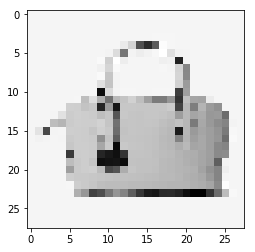

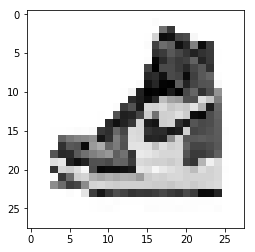

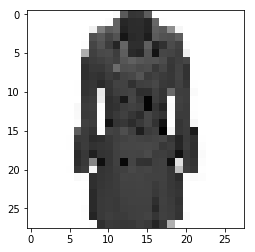

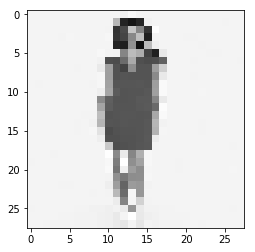

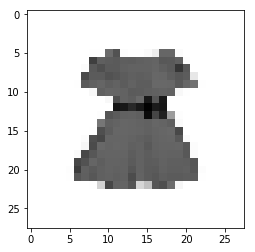

In [77]:
for i in range(len(label_dict)):
    print(i,label_dict[i])
print('\n')

for root,dirs,files in os.walk('./fashion_test/'):
    for file in files:
        print(file)
        img = image.load_img(os.path.join(root,file), target_size=(28, 28))
        #img_rgb = image.img_to_array(img)
        #img_gray = np.mean(img_rgb, axis=2)
        #img_gray = img_gray.reshape(1,32,32,1).astype('float32')
        #print(img_gray.shape)
        predictgray(Res34Model1, img)

print('\n')
print(np.argmax(Res34Model1.predict(testimg28281[0].reshape(1,28,28,1).astype('float32'))))
print(test_label[0])

# Simple Customized ResNet ( Only 1 Add )

In [80]:
input_tensor=Input(shape=trainimg28281.shape[1:])
cov1 = Conv2D(32, (3, 3), padding='same')(input_tensor)
act1 = Activation('relu')(cov1)

# max_pool1 = MaxPooling2D(pool_size=(2, 2))(act1)
# drop1 = Dropout(0.25)(max_pool1)

cov2 = Conv2D(3, (3, 3), padding='same')(act1)
act2 = Activation('relu')(cov2)

# max_pool2 = MaxPooling2D(pool_size=(2, 2))(act2)
# drop2 = Dropout(0.25)(max_pool2)

add = Add()([input_tensor, act2])

flat = Flatten()(add)

dense1 = Dense(512)(flat)
act3 = Activation('relu')(dense1)
drop3 = Dropout(0.5)(act3)

dense2 = Dense(10)(drop3)
outputs = Activation('softmax')(dense2)

CustomResModel = Model(input=input_tensor, output=outputs)
CustomResModel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 28, 28, 32)   320         input_8[0][0]                    
__________________________________________________________________________________________________
activation_152 (Activation)     (None, 28, 28, 32)   0           conv2d_40[0][0]                  
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 28, 28, 3)    867         activation_152[0][0]             
__________________________________________________________________________________________________
activation

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("ac..., inputs=Tensor("in...)`


In [81]:
#es = EarlyStopping(monitor='val_acc',mode='max',verbose=1,patience=50)
CustomResModel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
train_history = CustomResModel.fit(x=trainimg28281,y=train_label,validation_split=0.2, epochs=1000, batch_size=200,verbose=2,callbacks=[es])


Train on 44000 samples, validate on 11000 samples
Epoch 1/1000
 - 5s - loss: 0.6382 - acc: 0.7756 - val_loss: 0.4406 - val_acc: 0.8404
Epoch 2/1000
 - 2s - loss: 0.4431 - acc: 0.8377 - val_loss: 0.3645 - val_acc: 0.8688
Epoch 3/1000
 - 2s - loss: 0.3959 - acc: 0.8543 - val_loss: 0.3486 - val_acc: 0.8695
Epoch 4/1000
 - 2s - loss: 0.3674 - acc: 0.8651 - val_loss: 0.3293 - val_acc: 0.8790
Epoch 5/1000
 - 2s - loss: 0.3462 - acc: 0.8735 - val_loss: 0.3307 - val_acc: 0.8784
Epoch 6/1000
 - 2s - loss: 0.3311 - acc: 0.8763 - val_loss: 0.3228 - val_acc: 0.8834
Epoch 7/1000
 - 2s - loss: 0.3169 - acc: 0.8811 - val_loss: 0.3070 - val_acc: 0.8887
Epoch 8/1000
 - 2s - loss: 0.3082 - acc: 0.8854 - val_loss: 0.3099 - val_acc: 0.8870
Epoch 9/1000
 - 2s - loss: 0.2931 - acc: 0.8883 - val_loss: 0.2959 - val_acc: 0.8926
Epoch 10/1000
 - 2s - loss: 0.2853 - acc: 0.8922 - val_loss: 0.2933 - val_acc: 0.8928
Epoch 11/1000
 - 2s - loss: 0.2744 - acc: 0.8955 - val_loss: 0.2941 - val_acc: 0.8915
Epoch 12/1000

In [82]:
test_loss, test_acc = CustomResModel.evaluate(testimg28281, test_label)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 1s 90us/step
Test accuracy: 0.9049
Test loss: 0.5856658678524196


0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


bag.jpeg
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
8
sneaker.jpeg
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
8
coat.jpeg
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
8
dress.png
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
8
dress2.png
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
8


9
9


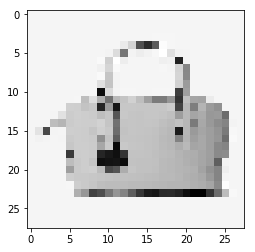

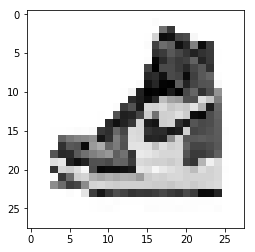

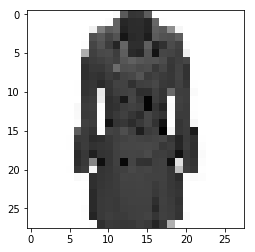

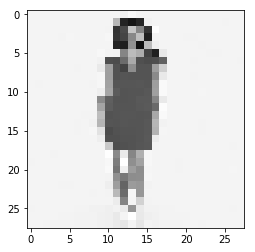

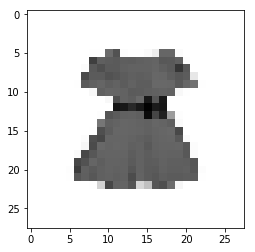

In [83]:
for i in range(len(label_dict)):
    print(i,label_dict[i])
print('\n')

for root,dirs,files in os.walk('./fashion_test/'):
    for file in files:
        print(file)
        img = image.load_img(os.path.join(root,file), target_size=(28, 28))
        #img_rgb = image.img_to_array(img)
        #img_gray = np.mean(img_rgb, axis=2)
        #img_gray = img_gray.reshape(1,32,32,1).astype('float32')
        #print(img_gray.shape)
        predictgray(CustomResModel, img)

print('\n')
print(np.argmax(CustomResModel.predict(testimg28281[0].reshape(1,28,28,1).astype('float32'))))
print(test_label[0])

## InceptionV3 shape minimum needs to be (75,75,3)

In [87]:
trainimg7575 = []
for i in range(train_img.shape[0]):
    newarray = np.pad(train_img[i],(0,47),mode='constant',constant_values=0)
    trainimg7575.append(newarray)
    
trainimg7575 = np.asarray(trainimg7575,dtype=np.float32)
trainimg75751 = trainimg7575.reshape(trainimg7575.shape[0],75,75,1)
print(trainimg7575.shape)
print(trainimg75751.shape)

testimg7575 = []
for i in range(test_img.shape[0]):
    newarray = np.pad(test_img[i],(0,47),mode='constant',constant_values=0)
    testimg7575.append(newarray)
    
testimg7575 = np.asarray(testimg7575,dtype=np.float32)
testimg75751 = testimg7575.reshape(testimg7575.shape[0],75,75,1)
print(testimg7575.shape)
print(testimg75751.shape)

(55000, 75, 75)
(55000, 75, 75, 1)
(10000, 75, 75)
(10000, 75, 75, 1)


In [89]:
#afterpadtrainimg75new = afterpadtrainimg75[0][:, :, None] * np.ones(3, dtype='float32')[None, None, :]
trainimg75753 = np.stack((trainimg7575,)*3, axis=-1)
testimg75753 = np.stack((testimg7575,)*3, axis=-1)
print(trainimg75753.shape)
print(testimg75753.shape)

(55000, 75, 75, 3)
(10000, 75, 75, 3)


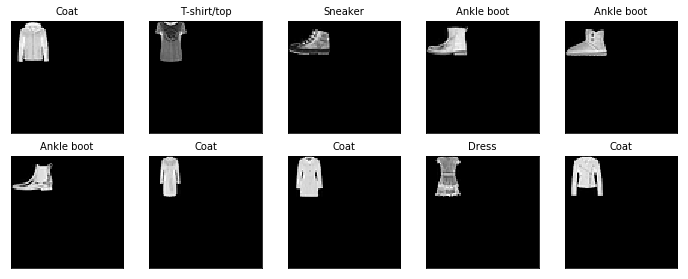

In [92]:
def plot_image_label_prediction(images, labels, prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,12)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
        
        title=label_dict[labels[i]]
        if(len(prediction)>0):
            title+='->'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()
    
plot_image_label_prediction(trainimg75753,train_label,[],0)

In [93]:
from tensorflow.keras_applications import inception_v3
from tensorflow.keras_applications.inception_v3 import preprocess_input,InceptionV3
input_tensor = Input(shape=(75,75,3),name='myowninputsetting')
base_model = inception_v3.InceptionV3(weights=None,input_tensor=input_tensor,include_top=False,backend = keras.backend, layers = keras.layers, models = keras.models, utils = keras.utils)
base_model.summary()
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = Flatten(name='myFlatten')(x)
x = Dense(1024,activation='relu',name='myfirstDense')(x)
x = Dropout(0.5)(x)
x = Dense(512,activation='relu',name='mysecondDense')(x)
x = Dropout(0.5)(x)
x = Dense(10,activation='softmax',name='myprediction')(x)
incepv3model1 = Model(inputs=base_model.input,outputs=x)
incepv3model1.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
myowninputsetting (InputLayer)  (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 37, 37, 32)   864         myowninputsetting[0][0]          
__________________________________________________________________________________________________
batch_normalization_37 (BatchNo (None, 37, 37, 32)   96          conv2d_42[0][0]                  
__________________________________________________________________________________________________
activation_156 (Activation)     (None, 37, 37, 32)   0           batch_normalization_37[0][0]     
__________________________________________________________________________________________________
conv2d_43 

In [ ]:
#es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=50)
incepv3model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
train_history = incepv3model1.fit(x=trainimg75753,y=train_label,validation_split=0.2, epochs=1000, batch_size=200,verbose=2,callbacks=[es])


Train on 44000 samples, validate on 11000 samples
Epoch 1/1000
 - 18s - loss: 2.0772 - acc: 0.2470 - val_loss: 2.3026 - val_acc: 0.1010
Epoch 2/1000
 - 11s - loss: 1.8024 - acc: 0.3497 - val_loss: 2.3029 - val_acc: 0.1010
Epoch 3/1000
 - 11s - loss: 1.7369 - acc: 0.3794 - val_loss: 2.3033 - val_acc: 0.1008
Epoch 4/1000
 - 11s - loss: 1.6933 - acc: 0.3973 - val_loss: 2.3039 - val_acc: 0.1008
Epoch 5/1000
 - 11s - loss: 1.6617 - acc: 0.4070 - val_loss: 2.3045 - val_acc: 0.0970
Epoch 6/1000
 - 11s - loss: 1.6414 - acc: 0.4129 - val_loss: 2.3064 - val_acc: 0.0970
Epoch 7/1000
 - 11s - loss: 1.6212 - acc: 0.4211 - val_loss: 2.3085 - val_acc: 0.0970
Epoch 8/1000
 - 11s - loss: 1.6080 - acc: 0.4280 - val_loss: 2.3106 - val_acc: 0.0970
Epoch 9/1000
 - 11s - loss: 1.6035 - acc: 0.4280 - val_loss: 2.3153 - val_acc: 0.0970
Epoch 10/1000
 - 11s - loss: 1.5894 - acc: 0.4317 - val_loss: 2.3197 - val_acc: 0.0970
Epoch 11/1000
 - 11s - loss: 1.5819 - acc: 0.4373 - val_loss: 2.3242 - val_acc: 0.0970
Ep

#  Customized Inception Model

In [94]:
def conv2d_bn(inputs,filters,kernel_size,strides=(1,1),padding='same'):
    x = Conv2D(filters,kernel_size=kernel_size,strides=strides,padding=padding)(inputs)
    x = BatchNormalization(axis=3,scale=False)(x)
    x = Activation('relu')(x)
    return x

def dimension_reduction_inception(inputs):
    from keras.layers import AveragePooling2D
    x = conv2d_bn(inputs, 32, kernel_size = (3, 3), strides=(2, 2), padding='valid')
    x = conv2d_bn(x, 32, kernel_size = (3, 3), padding='valid')
    x = conv2d_bn(x, 64, kernel_size = (3, 3))
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv2d_bn(x, 80, kernel_size=(1, 1), padding='valid')
    x = conv2d_bn(x, 192, kernel_size=(3, 3), padding='valid')
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    
    tower_one = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    tower_one = conv2d_bn(tower_one, 64, kernel_size = (1,1))

    tower_two = conv2d_bn(x, 64, kernel_size = (1,1))
    tower_two = conv2d_bn(tower_two, 64, kernel_size = (3,3))

    tower_three = conv2d_bn(x, 64, kernel_size = (1,1))
    tower_three = conv2d_bn(tower_three, 64, kernel_size = (5,5))
    x = concatenate([tower_one, tower_two, tower_three], axis=3)
    
    # mixed 0: 35 x 35 x 256
    branch1x1 = conv2d_bn(x, 64,kernel_size=(1, 1),strides=(1,1))

    branch5x5 = conv2d_bn(x, 48, kernel_size=(1, 1),strides=(1,1))
    branch5x5 = conv2d_bn(branch5x5, 64, kernel_size=(5, 5),strides=(1,1))

    branch3x3dbl = conv2d_bn(x, 64, kernel_size=(1, 1))
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, kernel_size=(3, 3))
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, kernel_size=(3,3))

    branch_pool = AveragePooling2D((3, 3),
                                          strides=(1, 1),
                                          padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 32,kernel_size=(1, 1))
    x = concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=3,
        name='mixed0')
    
    # mixed 1: 35 x 35 x 288
    branch1x1 = conv2d_bn(x, 64, kernel_size=(1, 1))

    branch5x5 = conv2d_bn(x, 48,kernel_size=(1, 1))
    branch5x5 = conv2d_bn(branch5x5, 64, kernel_size=(5,5))

    branch3x3dbl = conv2d_bn(x, 64, kernel_size=(1, 1))
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, kernel_size=(3,3))
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, kernel_size=(3,3))

    branch_pool = AveragePooling2D((3, 3),strides=(1, 1),padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 64, kernel_size=(1, 1))
    x = concatenate([branch1x1, branch5x5, branch3x3dbl, branch_pool],axis=3,name='mixed1')

    #mixed 2: 35 x 35 x 288
    branch1x1 = conv2d_bn(x, 64, kernel_size=(1, 1))

    branch5x5 = conv2d_bn(x, 48, kernel_size=(1, 1))
    branch5x5 = conv2d_bn(branch5x5, 64, kernel_size=(5,5))

    branch3x3dbl = conv2d_bn(x, 64, kernel_size=(1, 1))
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, kernel_size=(3, 3))
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, kernel_size=(3, 3))

    branch_pool = AveragePooling2D((3, 3),
                                          strides=(1, 1),
                                          padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 64, kernel_size=(1, 1))
    x = concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=3,
        name='mixed2')

    #mixed 3: 17 x 17 x 768
    branch3x3 = conv2d_bn(x, 384, kernel_size=(3, 3), strides=(2, 2), padding='valid')

    branch3x3dbl = conv2d_bn(x, 64, kernel_size=(1, 1))
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, kernel_size=(3, 3))
    branch3x3dbl = conv2d_bn(
    branch3x3dbl, 96, kernel_size=(3, 3), strides=(2, 2), padding='valid')

    branch_pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = concatenate([branch3x3, branch3x3dbl, branch_pool],axis=3,name='mixed3')

    # mixed 4: 17 x 17 x 768
    branch1x1 = conv2d_bn(x, 192, kernel_size=(1, 1))

    branch7x7 = conv2d_bn(x, 128, kernel_size=(1, 1))
    branch7x7 = conv2d_bn(branch7x7, 128, kernel_size=(1, 7))
    branch7x7 = conv2d_bn(branch7x7, 192, kernel_size=(7, 1))

    branch7x7dbl = conv2d_bn(x, 128, kernel_size=(1, 1))
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, kernel_size=(7, 1))
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, kernel_size=(1, 7))
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, kernel_size=(7, 1))
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, kernel_size=(1, 7))

    branch_pool = AveragePooling2D((3, 3),
                                          strides=(1, 1),
                                          padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 192, kernel_size=(1, 1))
    x = concatenate([branch1x1, branch7x7, branch7x7dbl, branch_pool],axis=3,name='mixed4')

    # mixed 5, 6: 17 x 17 x 768
    for i in range(2):
        branch1x1 = conv2d_bn(x, 192, kernel_size=(1, 1))

        branch7x7 = conv2d_bn(x, 160, kernel_size=(1, 1))
        branch7x7 = conv2d_bn(branch7x7, 160, kernel_size=(1, 7))
        branch7x7 = conv2d_bn(branch7x7, 192, kernel_size=(7, 1))

        branch7x7dbl = conv2d_bn(x, 160, kernel_size=(1, 1))
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, kernel_size=(7, 1))
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, kernel_size=(1, 7))
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, kernel_size=(7, 1))
        branch7x7dbl = conv2d_bn(branch7x7dbl, 192, kernel_size=(1, 7))

        branch_pool = AveragePooling2D(
            (3, 3), strides=(1, 1), padding='same')(x)
        branch_pool = conv2d_bn(branch_pool, 192, kernel_size=(1, 1))
        x = concatenate(
            [branch1x1, branch7x7, branch7x7dbl, branch_pool],
            axis=3,
            name='mixed' + str(5 + i))

    #mixed 7: 17 x 17 x 768
    branch1x1 = conv2d_bn(x, 192, kernel_size=(1, 1))

    branch7x7 = conv2d_bn(x, 192, kernel_size=(1, 1))
    branch7x7 = conv2d_bn(branch7x7, 192, kernel_size=(1, 7))
    branch7x7 = conv2d_bn(branch7x7, 192, kernel_size=(7, 1))

    branch7x7dbl = conv2d_bn(x, 192,kernel_size=(1, 1))
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, kernel_size=(7, 1))
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, kernel_size=(1, 7))
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, kernel_size=(7, 1))
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, kernel_size=(1, 7))

    branch_pool = AveragePooling2D((3, 3),strides=(1, 1),padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 192, kernel_size=(1, 1))
    x = concatenate([branch1x1, branch7x7, branch7x7dbl, branch_pool],axis=3,name='mixed7')

    #mixed 8: 8 x 8 x 1280
    branch3x3 = conv2d_bn(x, 192, kernel_size=(1, 1))
    branch3x3 = conv2d_bn(branch3x3, 320, kernel_size=(3, 3),strides=(2, 2), padding='valid')

    branch7x7x3 = conv2d_bn(x, 192, kernel_size=(1, 1))
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, kernel_size=(1, 7))
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, kernel_size=(7, 1))
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, kernel_size=(3, 3), strides=(2, 2), padding='valid')

    branch_pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = concatenate([branch3x3, branch7x7x3, branch_pool],axis=3,name='mixed8')

#mixed 9: 8 x 8 x 2048
    for i in range(2):
        branch1x1 = conv2d_bn(x, 320, kernel_size=(1, 1))

        branch3x3 = conv2d_bn(x, 384, kernel_size=(1, 1))
        branch3x3_1 = conv2d_bn(branch3x3, 384, kernel_size=(1, 3))
        branch3x3_2 = conv2d_bn(branch3x3, 384, kernel_size=(3, 1))
        branch3x3 = concatenate([branch3x3_1, branch3x3_2],axis=3,name='mixed9_' + str(i))

        branch3x3dbl = conv2d_bn(x, 448, kernel_size=(1, 1))
        branch3x3dbl = conv2d_bn(branch3x3dbl, 384, kernel_size=(3, 3))
        branch3x3dbl_1 = conv2d_bn(branch3x3dbl, 384, kernel_size=(1, 3))
        branch3x3dbl_2 = conv2d_bn(branch3x3dbl, 384, kernel_size=(3, 1))
        branch3x3dbl = concatenate([branch3x3dbl_1, branch3x3dbl_2], axis=3)

        branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
        branch_pool = conv2d_bn(branch_pool, 192, kernel_size=(1, 1))
        x = concatenate([branch1x1, branch3x3, branch3x3dbl, branch_pool],axis=3,name='mixed' + str(9 + i))
        return x

def dimension_reduction_model(x_train):

    inputs = Input(x_train)

    x = dimension_reduction_inception(inputs)
    #x = Flatten()(x)
    #x = Dense(64, activation='relu')(x)
    
    #Using AveragePooling replace flatten
    x = GlobalAveragePooling2D()(x)
    x = Dense(10, activation='softmax', name='predictions')(x)
    #predictions = Dense(10, activation='softmax')(x)

    model = Model(input=inputs, output=x)
    return model

In [65]:
modelB = dimension_reduction_model(train_img.shape[1:])
modelB.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_50 (Conv2D)              (None, 13, 13, 32)   320         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_48 (BatchNo (None, 13, 13, 32)   96          conv2d_50[0][0]                  
__________________________________________________________________________________________________
activation_457 (Activation)     (None, 13, 13, 32)   0           batch_normalization_48[0][0]     
__________________________________________________________________________________________________
conv2d_51 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:218: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`


In [66]:
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=50)
modelB.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
train_history = modelB.fit(x=train_img,y=train_label,validation_split=0.2, epochs=1000, batch_size=250,verbose=2,callbacks=[es])

Train on 44000 samples, validate on 11000 samples
Epoch 1/1000
 - 25s - loss: 0.7912 - acc: 0.7081 - val_loss: 0.6814 - val_acc: 0.7599
Epoch 2/1000
 - 8s - loss: 0.4592 - acc: 0.8288 - val_loss: 0.4768 - val_acc: 0.8333
Epoch 3/1000
 - 8s - loss: 0.3690 - acc: 0.8641 - val_loss: 0.4222 - val_acc: 0.8456
Epoch 4/1000
 - 8s - loss: 0.3172 - acc: 0.8831 - val_loss: 0.4712 - val_acc: 0.8295
Epoch 5/1000
 - 8s - loss: 0.2762 - acc: 0.8992 - val_loss: 0.3585 - val_acc: 0.8709
Epoch 6/1000
 - 8s - loss: 0.2483 - acc: 0.9092 - val_loss: 0.3934 - val_acc: 0.8700
Epoch 7/1000
 - 8s - loss: 0.2277 - acc: 0.9161 - val_loss: 0.4334 - val_acc: 0.8557
Epoch 8/1000
 - 8s - loss: 0.2035 - acc: 0.9250 - val_loss: 0.4412 - val_acc: 0.8673
Epoch 9/1000
 - 8s - loss: 0.1903 - acc: 0.9300 - val_loss: 0.4643 - val_acc: 0.8527
Epoch 10/1000
 - 8s - loss: 0.1790 - acc: 0.9334 - val_loss: 0.3982 - val_acc: 0.8757
Epoch 11/1000
 - 8s - loss: 0.1624 - acc: 0.9411 - val_loss: 0.3984 - val_acc: 0.8787
Epoch 12/100

In [67]:
test_loss, test_acc = modelB.evaluate(test_img, test_label)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 3s 335us/step
Test accuracy: 0.8873
Test loss: 0.608408523106575


# MobileNet

In [7]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input,MobileNet
base_model = MobileNet(weights=None,input_shape=(32,32,1),include_top=False)
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D(name='myFlatten')(x)
x = Dense(10,activation='softmax',name='myprediction')(x)
mobilemodel = Model(inputs=base_model.input,outputs=x)
mobilemodel.summary()

W0725 05:56:40.013798 139674573018880 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        288       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)        128   

In [8]:
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
mobilemodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
train_history = mobilemodel.fit(x=trainimg32321,y=train_label,validation_split=0.2, epochs=500, batch_size=300,verbose=2,callbacks=[es])


Train on 44000 samples, validate on 11000 samples
Epoch 1/500
44000/44000 - 12s - loss: 2.2838 - acc: 0.1768 - val_loss: 2.3026 - val_acc: 0.1010
Epoch 2/500
44000/44000 - 12s - loss: 2.1092 - acc: 0.2423 - val_loss: 2.3026 - val_acc: 0.1010
Epoch 3/500
44000/44000 - 11s - loss: 2.0582 - acc: 0.2626 - val_loss: 2.3026 - val_acc: 0.1010
Epoch 4/500
44000/44000 - 11s - loss: 2.0325 - acc: 0.2691 - val_loss: 2.3026 - val_acc: 0.1010
Epoch 5/500
44000/44000 - 11s - loss: 2.0167 - acc: 0.2794 - val_loss: 2.3026 - val_acc: 0.1010
Epoch 6/500
44000/44000 - 11s - loss: 2.0053 - acc: 0.2825 - val_loss: 2.3026 - val_acc: 0.1010
Epoch 7/500
44000/44000 - 12s - loss: 1.9984 - acc: 0.2841 - val_loss: 2.3026 - val_acc: 0.1010
Epoch 8/500
44000/44000 - 12s - loss: 1.9960 - acc: 0.2882 - val_loss: 2.3026 - val_acc: 0.1010
Epoch 00008: early stopping
